# **CH12** 시계열 데이터

## 1. datetime 모듈


class
- 날짜 처리 : date
- 시간 처리 : time
- 날짜/시간 모두 처리 : datetime

In [64]:
import pandas as pd
import seaborn as sns
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

# from 모듈 import class
from datetime import datetime


In [9]:
datetime.now()

datetime.datetime(2023, 5, 2, 10, 13, 4, 934561)

In [10]:
print(datetime.now())

2023-05-02 10:13:15.300248


In [7]:
datetime.today()

datetime.datetime(2023, 5, 2, 10, 12, 31, 744699)

In [19]:
t1 = datetime.now()
t2 = datetime(1970,1,1)
t3 = datetime(2023,8,8,2,24,36)
print(t2,t3)

1970-01-01 00:00:00 2023-08-08 02:24:36


In [20]:
print(t3-t1)

97 days, 15:58:14.082344


In [21]:
type(t3-t1)

datetime.timedelta

In [22]:
print(t1-t3)

-98 days, 8:01:45.917656


### ***to_datetime***

날짜 연산을 위하여 문자열 -> datetime object

In [18]:
ebola = pd.read_csv('../data/country_timeseries.csv')
ebola.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 122 non-null    object 
 1   Day                  122 non-null    int64  
 2   Cases_Guinea         93 non-null     float64
 3   Cases_Liberia        83 non-null     float64
 4   Cases_SierraLeone    87 non-null     float64
 5   Cases_Nigeria        38 non-null     float64
 6   Cases_Senegal        25 non-null     float64
 7   Cases_UnitedStates   18 non-null     float64
 8   Cases_Spain          16 non-null     float64
 9   Cases_Mali           12 non-null     float64
 10  Deaths_Guinea        92 non-null     float64
 11  Deaths_Liberia       81 non-null     float64
 12  Deaths_SierraLeone   87 non-null     float64
 13  Deaths_Nigeria       38 non-null     float64
 14  Deaths_Senegal       22 non-null     float64
 15  Deaths_UnitedStates  18 non-null     flo

In [23]:
ebola['date_dt'] = pd.to_datetime(ebola['Date'])
ebola.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 122 non-null    object        
 1   Day                  122 non-null    int64         
 2   Cases_Guinea         93 non-null     float64       
 3   Cases_Liberia        83 non-null     float64       
 4   Cases_SierraLeone    87 non-null     float64       
 5   Cases_Nigeria        38 non-null     float64       
 6   Cases_Senegal        25 non-null     float64       
 7   Cases_UnitedStates   18 non-null     float64       
 8   Cases_Spain          16 non-null     float64       
 9   Cases_Mali           12 non-null     float64       
 10  Deaths_Guinea        92 non-null     float64       
 11  Deaths_Liberia       81 non-null     float64       
 12  Deaths_SierraLeone   87 non-null     float64       
 13  Deaths_Nigeria       38 non-null   

#### 형식 지정자(format)

In [24]:
test_df1 = pd.DataFrame({
    'order_day' : ['01/01/15','02/01/15','03/01/15']
})

In [26]:
test_df1['date_dt1'] = pd.to_datetime(test_df1['order_day'], format='%d/%m/%y')
test_df1['date_df2'] = pd.to_datetime(test_df1['order_day'], format='%m/%d/%y')
test_df1['date_df3'] = pd.to_datetime(test_df1['order_day'], format='%y/%m/%d')

test_df1

,order_day,date_dt1,date_df2,date_df3
0,01/01/15,2015-01-01,2015-01-01,2001-01-15
1,02/01/15,2015-01-02,2015-02-01,2002-01-15
2,03/01/15,2015-01-03,2015-03-01,2003-01-15


In [27]:
test_df2 = pd.DataFrame({
    'order_day' : ['01-01-15','02-01-15','03-01-15']
})

In [28]:
test_df2['date_dt'] = pd.to_datetime(test_df2['order_day'], format='%d-%m-%y')
test_df2

,order_day,date_dt
0,01-01-15,2015-01-01
1,02-01-15,2015-01-02
2,03-01-15,2015-01-03


### ***read_csv*** ( ,parse_dates=)

In [143]:
ebola1 = pd.read_csv('../data/country_timeseries.csv', parse_dates=['Date'])
ebola1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 122 non-null    datetime64[ns]
 1   Day                  122 non-null    int64         
 2   Cases_Guinea         93 non-null     float64       
 3   Cases_Liberia        83 non-null     float64       
 4   Cases_SierraLeone    87 non-null     float64       
 5   Cases_Nigeria        38 non-null     float64       
 6   Cases_Senegal        25 non-null     float64       
 7   Cases_UnitedStates   18 non-null     float64       
 8   Cases_Spain          16 non-null     float64       
 9   Cases_Mali           12 non-null     float64       
 10  Deaths_Guinea        92 non-null     float64       
 11  Deaths_Liberia       81 non-null     float64       
 12  Deaths_SierraLeone   87 non-null     float64       
 13  Deaths_Nigeria       38 non-null   

### datetime 오브젝트에서 날짜 정보 추출하기

In [30]:
date_series = pd.Series(['2018-05-16','2018-05-17','2018-05-18'])
d1 = pd.to_datetime(date_series)
d1

0   2018-05-16
1   2018-05-17
2   2018-05-18
dtype: datetime64[ns]

In [33]:
d1[0].year, d1[0].month, d1[0].day

(2018, 5, 16)

### dt 접근자 사용하기

In [144]:
ebola = pd.read_csv('../data/country_timeseries.csv')
ebola['date_dt'] = pd.to_datetime(ebola['Date'])

In [35]:
ebola[['Date','date_dt']].head()

,Date,date_dt
0,1/5/2015,2015-01-05
1,1/4/2015,2015-01-04
2,1/3/2015,2015-01-03
3,1/2/2015,2015-01-02
4,12/31/2014,2014-12-31


In [36]:
ebola['date_dt'][3].year

2015

In [39]:
# series.dt.year =>  return series
ebola['year'] = ebola['date_dt'].dt.year

In [38]:
ebola[['Date','date_dt','year']].head()

,Date,date_dt,year
0,1/5/2015,2015-01-05,2015
1,1/4/2015,2015-01-04,2015
2,1/3/2015,2015-01-03,2015
3,1/2/2015,2015-01-02,2015
4,12/31/2014,2014-12-31,2014


In [40]:
ebola['month'],ebola['day'] = (ebola['date_dt'].dt.month,ebola['date_dt'].dt.day)
ebola[['Date','date_dt','year','month','day']].head()

,Date,date_dt,year,month,day
0,1/5/2015,2015-01-05,2015,1,5
1,1/4/2015,2015-01-04,2015,1,4
2,1/3/2015,2015-01-03,2015,1,3
3,1/2/2015,2015-01-02,2015,1,2
4,12/31/2014,2014-12-31,2014,12,31


## 2. 사례별 시계열 데이터 계산하기

### 에볼라 최초 발병일 계산하기

In [41]:
ebola.iloc[-5:, :5]

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone
117,3/27/2014,5,103.0,8.0,6.0
118,3/26/2014,4,86.0,NaN,NaN
119,3/25/2014,3,86.0,NaN,NaN
120,3/24/2014,2,86.0,NaN,NaN
121,3/22/2014,0,49.0,NaN,NaN


In [146]:
ebola.loc[ebola['date_dt']== ebola['date_dt'].min(),'Date']

121    3/22/2014
Name: Date, dtype: object

In [44]:
# 발병 후 진행정도

ebola['outbreak_d'] = ebola['date_dt'] - ebola['date_dt'].min()
ebola[['Date','Day','outbreak_d']].head()

,Date,Day,outbreak_d
0,1/5/2015,289,289 days
1,1/4/2015,288,288 days
2,1/3/2015,287,287 days
3,1/2/2015,286,286 days
4,12/31/2014,284,284 days


### 파산한 은행의 개수 계산하기 (분기별)

In [56]:
banks = pd.read_csv('../data/banklist.csv')
banks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555 entries, 0 to 554
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Bank Name              555 non-null    object
 1   City                   555 non-null    object
 2   ST                     555 non-null    object
 3   CERT                   555 non-null    int64 
 4   Acquiring Institution  555 non-null    object
 5   Closing Date           555 non-null    object
 6   Updated Date           555 non-null    object
dtypes: int64(1), object(6)
memory usage: 30.5+ KB


In [57]:
banks.head()

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date
0,Washington Federal Bank for Savings,Chicago,IL,30570,Royal Savings Bank,15-Dec-17,20-Dec-17
1,The Farmers and Merchants State Bank of Argonia,Argonia,KS,17719,Conway Bank,13-Oct-17,20-Oct-17
2,Fayette County Bank,Saint Elmo,IL,1802,"United Fidelity Bank, fsb",26-May-17,26-Jul-17
3,"Guaranty Bank, (d/b/a BestBank in Georgia & Mi...",Milwaukee,WI,30003,First-Citizens Bank & Trust Company,5-May-17,26-Jul-17
4,First NBC Bank,New Orleans,LA,58302,Whitney Bank,28-Apr-17,5-Dec-17


In [ ]:
pd.read_excel?

In [157]:
banks = pd.read_csv('../data/banklist.csv'
                    ,parse_dates=[5,6]
                    ,date_format='%d-%b-%y'
                    )
banks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555 entries, 0 to 554
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Bank Name              555 non-null    object        
 1   City                   555 non-null    object        
 2   ST                     555 non-null    object        
 3   CERT                   555 non-null    int64         
 4   Acquiring Institution  555 non-null    object        
 5   Closing Date           555 non-null    datetime64[ns]
 6   Updated Date           555 non-null    datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 30.5+ KB


In [158]:
banks.head()

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date
0,Washington Federal Bank for Savings,Chicago,IL,30570,Royal Savings Bank,2017-12-15,2017-12-20
1,The Farmers and Merchants State Bank of Argonia,Argonia,KS,17719,Conway Bank,2017-10-13,2017-10-20
2,Fayette County Bank,Saint Elmo,IL,1802,"United Fidelity Bank, fsb",2017-05-26,2017-07-26
3,"Guaranty Bank, (d/b/a BestBank in Georgia & Mi...",Milwaukee,WI,30003,First-Citizens Bank & Trust Company,2017-05-05,2017-07-26
4,First NBC Bank,New Orleans,LA,58302,Whitney Bank,2017-04-28,2017-12-05


In [159]:
# 분기 구하기

banks['closing_quater'], banks['closing_year'] = (banks['Closing Date'].dt.quarter, banks['Closing Date'].dt.year)
banks.head()


,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date,closing_quater,closing_year
0,Washington Federal Bank for Savings,Chicago,IL,30570,Royal Savings Bank,2017-12-15,2017-12-20,4,2017
1,The Farmers and Merchants State Bank of Argonia,Argonia,KS,17719,Conway Bank,2017-10-13,2017-10-20,4,2017
2,Fayette County Bank,Saint Elmo,IL,1802,"United Fidelity Bank, fsb",2017-05-26,2017-07-26,2,2017
3,"Guaranty Bank, (d/b/a BestBank in Georgia & Mi...",Milwaukee,WI,30003,First-Citizens Bank & Trust Company,2017-05-05,2017-07-26,2,2017
4,First NBC Bank,New Orleans,LA,58302,Whitney Bank,2017-04-28,2017-12-05,2,2017


In [160]:
closing_year = banks.groupby(['closing_year']).size()
closing_year

closing_year
2000      2
2001      4
2002     11
2003      3
2004      4
2007      3
2008     25
2009    140
2010    157
2011     92
2012     51
2013     24
2014     18
2015      8
2016      5
2017      8
dtype: int64

In [161]:
closing_year_q = banks.groupby(['closing_year','closing_quater']).size()
closing_year_q

closing_year  closing_quater
2000          4                  2
2001          1                  1
              2                  1
              3                  2
2002          1                  6
              2                  2
              3                  1
              4                  2
2003          1                  1
              2                  1
              4                  1
2004          1                  3
              2                  1
2007          1                  1
              3                  1
              4                  1
2008          1                  2
              2                  2
              3                  9
              4                 12
2009          1                 21
              2                 24
              3                 50
              4                 45
2010          1                 41
              2                 45
              3                 41
              4           

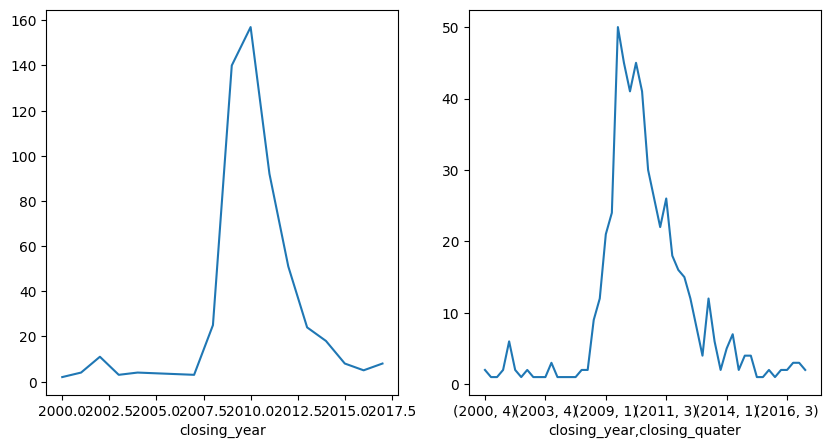

In [169]:
#fig = plt.subplots()
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,2,1)
ax1 = closing_year.plot()
ax2= fig.add_subplot(1,2,2)
ax2 = closing_year_q.plot()

### 테슬라주식 데이터로 시간 계산하기

In [78]:
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader as pdr

In [ ]:
#tesla = pdr.get_data_quandl('TSLA',api_key= )
#tesla.to_csv('../data/tesla_stock_quandl.csv)

In [170]:
tesla = pd.read_csv('../data/tesla_stock_quandl.csv', parse_dates=[0])
tesla.head()

,Date,Open,High,Low,Close,Volume,ExDividend,SplitRatio,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume
0,2018-03-27,304.00,304.27,277.18,279.18,13696168.0,0.0,1.0,304.00,304.27,277.18,279.18,13696168.0
1,2018-03-26,307.34,307.59,291.36,304.18,8324639.0,0.0,1.0,307.34,307.59,291.36,304.18,8324639.0
2,2018-03-23,311.25,311.61,300.45,301.54,6600538.0,0.0,1.0,311.25,311.61,300.45,301.54,6600538.0
3,2018-03-22,313.89,318.82,308.18,309.10,4914307.0,0.0,1.0,313.89,318.82,308.18,309.10,4914307.0
4,2018-03-21,310.25,322.44,310.19,316.53,5927881.0,0.0,1.0,310.25,322.44,310.19,316.53,5927881.0


In [171]:
tesla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1949 entries, 0 to 1948
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        1949 non-null   datetime64[ns]
 1   Open        1949 non-null   float64       
 2   High        1949 non-null   float64       
 3   Low         1949 non-null   float64       
 4   Close       1949 non-null   float64       
 5   Volume      1949 non-null   float64       
 6   ExDividend  1949 non-null   float64       
 7   SplitRatio  1949 non-null   float64       
 8   AdjOpen     1949 non-null   float64       
 9   AdjHigh     1949 non-null   float64       
 10  AdjLow      1949 non-null   float64       
 11  AdjClose    1949 non-null   float64       
 12  AdjVolume   1949 non-null   float64       
dtypes: datetime64[ns](1), float64(12)
memory usage: 198.1 KB


In [172]:
# 2010년 6월 데이터만 추출

tesla.loc[(tesla.Date.dt.year == 2010) & (tesla.Date.dt.month == 6)]

,Date,Open,High,Low,Close,Volume,ExDividend,SplitRatio,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume
1947,2010-06-30,25.79,30.4192,23.30,23.83,17187100.0,0.0,1.0,25.79,30.4192,23.30,23.83,17187100.0
1948,2010-06-29,19.00,25.0000,17.54,23.89,18766300.0,0.0,1.0,19.00,25.0000,17.54,23.89,18766300.0


### ***DatetimeIndex***

datetime 오브젝트를 인덱스로 설정해 데이터 추출하기

In [173]:
tesla.index = tesla['Date']
tesla.index

DatetimeIndex(['2018-03-27', '2018-03-26', '2018-03-23', '2018-03-22',
               '2018-03-21', '2018-03-20', '2018-03-19', '2018-03-16',
               '2018-03-15', '2018-03-14',
               ...
               '2010-07-13', '2010-07-12', '2010-07-09', '2010-07-08',
               '2010-07-07', '2010-07-06', '2010-07-02', '2010-07-01',
               '2010-06-30', '2010-06-29'],
              dtype='datetime64[ns]', name='Date', length=1949, freq=None)

In [174]:
tesla['2018-03-14':]

,Date,Open,High,Low,Close,Volume,ExDividend,SplitRatio,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume
Date,,,,,,,,,,,,,
2018-03-27,2018-03-27,304.00,304.27,277.18,279.18,13696168.0,0.0,1.0,304.00,304.27,277.18,279.18,13696168.0
2018-03-26,2018-03-26,307.34,307.59,291.36,304.18,8324639.0,0.0,1.0,307.34,307.59,291.36,304.18,8324639.0
2018-03-23,2018-03-23,311.25,311.61,300.45,301.54,6600538.0,0.0,1.0,311.25,311.61,300.45,301.54,6600538.0
2018-03-22,2018-03-22,313.89,318.82,308.18,309.10,4914307.0,0.0,1.0,313.89,318.82,308.18,309.10,4914307.0
2018-03-21,2018-03-21,310.25,322.44,310.19,316.53,5927881.0,0.0,1.0,310.25,322.44,310.19,316.53,5927881.0
2018-03-20,2018-03-20,314.87,316.25,308.76,310.55,4726182.0,0.0,1.0,314.87,316.25,308.76,310.55,4726182.0
2018-03-19,2018-03-19,316.50,320.75,309.67,313.56,7440766.0,0.0,1.0,316.50,320.75,309.67,313.56,7440766.0
2018-03-16,2018-03-16,325.96,327.40,319.07,321.35,6058612.0,0.0,1.0,325.96,327.40,319.07,321.35,6058612.0
2018-03-15,2018-03-15,329.38,332.85,321.10,325.60,6366922.0,0.0,1.0,329.38,332.85,321.10,325.60,6366922.0


In [ ]:
tesla['2018':] # .iloc[:5,:5]

In [186]:
tesla['Open']

Date
2018-03-27    304.00
2018-03-26    307.34
2018-03-23    311.25
2018-03-22    313.89
2018-03-21    310.25
               ...  
2010-07-06     20.00
2010-07-02     23.00
2010-07-01     25.00
2010-06-30     25.79
2010-06-29     19.00
Name: Open, Length: 1949, dtype: float64

### ***TimedeltaIndex***

시간 간격을 인덱스로 지정

In [100]:
tesla['ref_date'] = tesla['Date'] - tesla['Date'].min()
tesla.head()

,Date,Open,High,Low,Close,Volume,ExDividend,SplitRatio,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume,ref_date
Date,,,,,,,,,,,,,,
2018-03-27,2018-03-27,304.00,304.27,277.18,279.18,13696168.0,0.0,1.0,304.00,304.27,277.18,279.18,13696168.0,2828 days
2018-03-26,2018-03-26,307.34,307.59,291.36,304.18,8324639.0,0.0,1.0,307.34,307.59,291.36,304.18,8324639.0,2827 days
2018-03-23,2018-03-23,311.25,311.61,300.45,301.54,6600538.0,0.0,1.0,311.25,311.61,300.45,301.54,6600538.0,2824 days
2018-03-22,2018-03-22,313.89,318.82,308.18,309.10,4914307.0,0.0,1.0,313.89,318.82,308.18,309.10,4914307.0,2823 days
2018-03-21,2018-03-21,310.25,322.44,310.19,316.53,5927881.0,0.0,1.0,310.25,322.44,310.19,316.53,5927881.0,2822 days


In [101]:
tesla.index = tesla['ref_date']
tesla.iloc[:5,:5]

,Date,Open,High,Low,Close
ref_date,,,,,
2828 days,2018-03-27,304.00,304.27,277.18,279.18
2827 days,2018-03-26,307.34,307.59,291.36,304.18
2824 days,2018-03-23,311.25,311.61,300.45,301.54
2823 days,2018-03-22,313.89,318.82,308.18,309.10
2822 days,2018-03-21,310.25,322.44,310.19,316.53


In [102]:
tesla['5 days':].iloc[:5,:5]

,Date,Open,High,Low,Close
ref_date,,,,,
3 days,2010-07-02,23.00,23.1000,18.71,19.20
2 days,2010-07-01,25.00,25.9200,20.27,21.96
1 days,2010-06-30,25.79,30.4192,23.30,23.83
0 days,2010-06-29,19.00,25.0000,17.54,23.89


### 시간범위와 인덱스

In [103]:
# 시간범위 생성해 인덱스로 지정하기

ebola = pd.read_csv('../data/country_timeseries.csv', parse_dates=[0])
ebola.iloc[:5,:5]

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone
0,2015-01-05,289,2776.0,NaN,10030.0
1,2015-01-04,288,2775.0,NaN,9780.0
2,2015-01-03,287,2769.0,8166.0,9722.0
3,2015-01-02,286,NaN,8157.0,NaN
4,2014-12-31,284,2730.0,8115.0,9633.0


In [104]:
head_range = pd.date_range(start='2014-12-31', end='2015-01-05')
head_range

DatetimeIndex(['2014-12-31', '2015-01-01', '2015-01-02', '2015-01-03',
               '2015-01-04', '2015-01-05'],
              dtype='datetime64[ns]', freq='D')

* freq=

: 시간 주기

        - D : 달력 일자 단위
        - ** B : 평일만(비즈니스데이)
        - W : 주간 단위

In [106]:
ebola_5 = ebola.head()
ebola_5.index = ebola_5['Date']
ebola_5.reindex(head_range)
ebola_5.iloc[:,:5]

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone
Date,,,,,
2015-01-05,2015-01-05,289,2776.0,NaN,10030.0
2015-01-04,2015-01-04,288,2775.0,NaN,9780.0
2015-01-03,2015-01-03,287,2769.0,8166.0,9722.0
2015-01-02,2015-01-02,286,NaN,8157.0,NaN
2014-12-31,2014-12-31,284,2730.0,8115.0,9633.0


In [111]:
pd.date_range('2023-04-27', '2023-05-09',freq='B')

DatetimeIndex(['2023-04-27', '2023-04-28', '2023-05-01', '2023-05-02',
               '2023-05-03', '2023-05-04', '2023-05-05', '2023-05-08',
               '2023-05-09'],
              dtype='datetime64[ns]', freq='B')

### ***shift***

시간범위 수정하고 데이터 밀어내기

In [189]:
ebola.index = ebola['Date']

In [190]:
ebola.head()

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali,date_dt
Date,,,,,,,,,,,,,,,,,,,
1/5/2015,1/5/2015,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN,2015-01-05
1/4/2015,1/4/2015,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN,2015-01-04
1/3/2015,1/3/2015,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN,2015-01-03
1/2/2015,1/2/2015,286,NaN,8157.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-02
12/31/2014,12/31/2014,284,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,NaN,NaN,NaN,2014-12-31


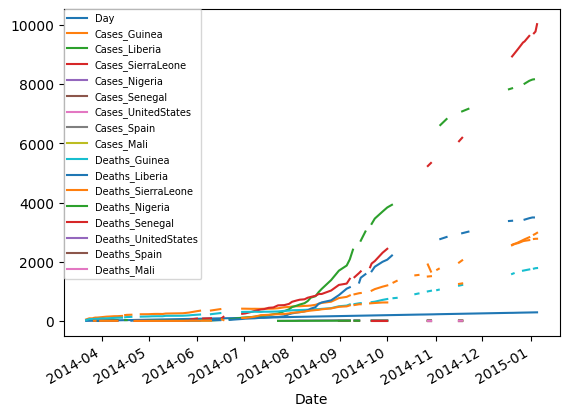

In [118]:
fig, ax = plt.subplots()
ax = ebola.iloc[:, 1:].plot(ax=ax)
ax.legend(fontsize=7, loc=2, borderaxespad=0.)
plt.show()

#### 각 나라별 처음 발생시점으로 그래프 출발 통일

In [213]:
ebola = pd.read_csv('../data/country_timeseries.csv', parse_dates=['Date'])

In [214]:
ebola.index = ebola['Date']


# 빠진 날짜 없이 모든 날짜 포함한 (인덱스) 만들기
new_idx = pd.date_range(ebola.index.min(), ebola.index.max())
new_idx

DatetimeIndex(['2014-03-22', '2014-03-23', '2014-03-24', '2014-03-25',
               '2014-03-26', '2014-03-27', '2014-03-28', '2014-03-29',
               '2014-03-30', '2014-03-31',
               ...
               '2014-12-27', '2014-12-28', '2014-12-29', '2014-12-30',
               '2014-12-31', '2015-01-01', '2015-01-02', '2015-01-03',
               '2015-01-04', '2015-01-05'],
              dtype='datetime64[ns]', length=290, freq='D')

In [215]:
new_idx = reversed(new_idx)

In [216]:
ebola = ebola.reindex(new_idx)
ebola.iloc[:7,:9]

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain
Date,,,,,,,,,
2015-01-05,2015-01-05,289.0,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN
2015-01-04,2015-01-04,288.0,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN
2015-01-03,2015-01-03,287.0,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN
2015-01-02,2015-01-02,286.0,NaN,8157.0,NaN,NaN,NaN,NaN,NaN
2015-01-01,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-12-31,2014-12-31,284.0,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN
2014-12-30,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### 각 나라의 에볼라 발병일 옮기기

In [217]:
# pd.Series.last_valid_index : 가장 오래된 데이터

last_valid = ebola.apply(pd.Series.last_valid_index)
last_valid

Date                  2014-03-22
Day                   2014-03-22
Cases_Guinea          2014-03-22
Cases_Liberia         2014-03-27
Cases_SierraLeone     2014-03-27
Cases_Nigeria         2014-07-23
Cases_Senegal         2014-08-31
Cases_UnitedStates    2014-10-01
Cases_Spain           2014-10-08
Cases_Mali            2014-10-22
Deaths_Guinea         2014-03-22
Deaths_Liberia        2014-03-27
Deaths_SierraLeone    2014-03-27
Deaths_Nigeria        2014-07-23
Deaths_Senegal        2014-09-07
Deaths_UnitedStates   2014-10-01
Deaths_Spain          2014-10-08
Deaths_Mali           2014-10-22
dtype: datetime64[ns]

In [218]:
# pd.Series.first_valid_index : 가장 최근의 데이터

first_valid = ebola.apply(pd.Series.first_valid_index)
first_valid

Date                  2015-01-05
Day                   2015-01-05
Cases_Guinea          2015-01-05
Cases_Liberia         2015-01-03
Cases_SierraLeone     2015-01-05
Cases_Nigeria         2014-12-07
Cases_Senegal         2014-12-07
Cases_UnitedStates    2014-12-07
Cases_Spain           2014-12-07
Cases_Mali            2014-12-07
Deaths_Guinea         2015-01-05
Deaths_Liberia        2015-01-03
Deaths_SierraLeone    2015-01-05
Deaths_Nigeria        2014-12-07
Deaths_Senegal        2014-12-07
Deaths_UnitedStates   2014-12-07
Deaths_Spain          2014-12-07
Deaths_Mali           2014-12-07
dtype: datetime64[ns]

In [219]:
# 가장 처음 발병한 날
earlist_date = ebola.index.min()
earlist_date

Timestamp('2014-03-22 00:00:00')

In [220]:
# 나라별 에볼라 발병 기간
shift_values = last_valid - earlist_date
shift_values

Date                    0 days
Day                     0 days
Cases_Guinea            0 days
Cases_Liberia           5 days
Cases_SierraLeone       5 days
Cases_Nigeria         123 days
Cases_Senegal         162 days
Cases_UnitedStates    193 days
Cases_Spain           200 days
Cases_Mali            214 days
Deaths_Guinea           0 days
Deaths_Liberia          5 days
Deaths_SierraLeone      5 days
Deaths_Nigeria        123 days
Deaths_Senegal        169 days
Deaths_UnitedStates   193 days
Deaths_Spain          200 days
Deaths_Mali           214 days
dtype: timedelta64[ns]

In [221]:
# shift : 인잣값만큼 데이터를 밀어내는 메서드

ebola_dict = {}

for idx, col in enumerate(ebola):
    d = shift_values[idx].days
    shifted = ebola[col].shift(d)
    ebola_dict[col] = shifted

In [222]:
ebola_shift = pd.DataFrame(ebola_dict)

In [223]:
ebola_shift.iloc[:,:9]

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain
Date,,,,,,,,,
2015-01-05,2015-01-05,289.0,2776.0,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-04,2015-01-04,288.0,2775.0,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-03,2015-01-03,287.0,2769.0,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-02,2015-01-02,286.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-01,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2014-03-26,2014-03-26,4.0,86.0,8.0,2.0,1.0,NaN,1.0,1.0
2014-03-25,2014-03-25,3.0,86.0,NaN,NaN,NaN,NaN,NaN,NaN
2014-03-24,2014-03-24,2.0,86.0,7.0,NaN,NaN,NaN,NaN,NaN


In [ ]:
ebola_shift.index = ebola_shift['Day']
ebola_shift = ebola_shift.drop(['Date','Day'], axis=1)

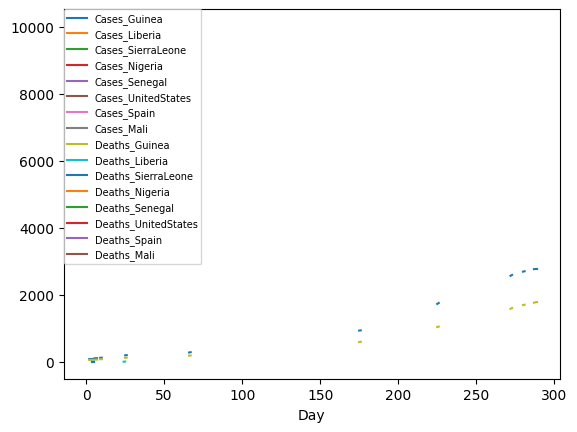

In [226]:
fig, ax = plt.subplots()
ax = ebola_shift.iloc[:,:].plot(ax=ax)
ax.legend(fontsize=7, loc=2, borderaxespad=0.)
plt.show()